In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [3]:
def plot_gallery(images,titles,h,w,n_rows=3,n_col=4):
    plt.figure(figsize=(1.8*n_col,2.4*n_rows))
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.35)
    for i in range(n_rows*n_col):
        plt.subplot(n_rows,n_col,i+1)
        plt.imshow(images[i].reshape(h,w),cmap=plt.cm.gray)
        plt.title(titles[i],size=12)
        plt.xticks(())
        plt.yticks(())


In [4]:
dir_name="dataset/faces/"
y=[];x=[];target_names=[]
person_id=0;h=w=300
n_samples=0
class_names=[]
for person_name in os.listdir(dir_name):
    dir_path=dir_name+person_name+"/"
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path=dir_path+image_name
        img=cv2.imread(image_path)
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_images=cv2.resize(gray,(h,w))
        v=resized_images.flatten()
        x.append(v)
        n_samples=n_samples+1
        y.append(person_id)
        target_names.append(person_name)
    person_id=person_id+1

In [5]:
y=np.array(y)
x=np.array(x)
target_array=np.array(target_names)
n_feature=x.shape[1]
print(y.shape,x.shape,y.shape)
print("Number of sample:",n_samples)

(450,) (450, 90000) (450,)
Number of sample: 450


In [6]:
print("Total data size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_feature)
print("n_classes: %d" % n_samples)

Total data size:
n_samples: 450
n_features: 90000
n_classes: 450


Extracting the top 150 eigenfaces from 337 faces


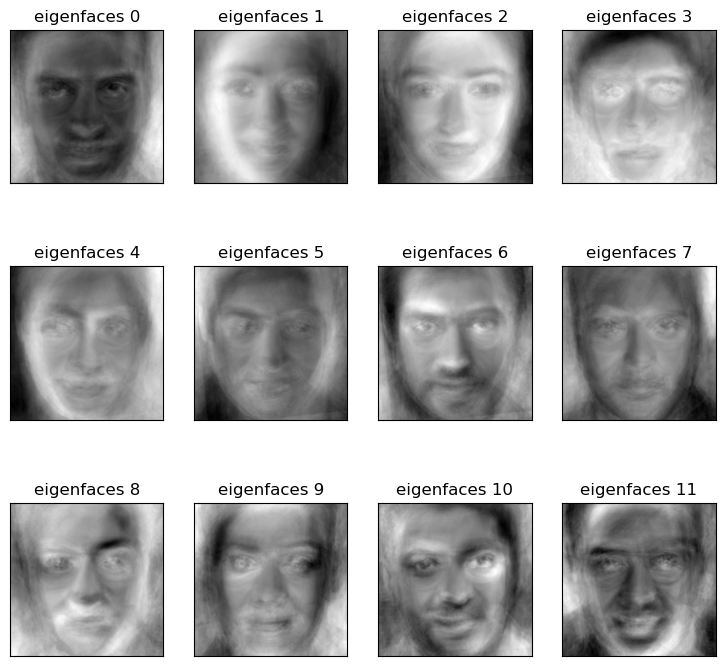

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
n_component=150
print("Extracting the top %d eigenfaces from %d faces"%(n_component,x_train.shape[0]))
pca=PCA(n_components=n_component,svd_solver='randomized',whiten=True).fit(x_train)
eigenfaces=pca.components_.reshape((n_component,h,w))
eigenfaces_titles=["eigenfaces %d" %i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenfaces_titles,h,w)
plt.show()


In [8]:
print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)
print(x_test_pca.shape,x_train_pca.shape)

Projecting the input data on the eigenfaces orthonormal basis
(113, 150) (337, 150)


In [9]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train_pca,y_train)
x_train_lda=lda.transform(x_train_pca)
x_test_lda=lda.transform(x_test_pca)
print("Project Done!!!!!!")

Project Done!!!!!!


In [10]:
clf=MLPClassifier(random_state=1,hidden_layer_sizes=(10,10),max_iter=1000,verbose=True).fit(x_train_lda,y_train)
print("Model Weights:")
model_info=[coef.shape for coef in clf.coefs_]
print(model_info)

Iteration 1, loss = 3.04130613
Iteration 2, loss = 2.99090287
Iteration 3, loss = 2.94320581
Iteration 4, loss = 2.89591955
Iteration 5, loss = 2.85079189
Iteration 6, loss = 2.80768677
Iteration 7, loss = 2.76518631
Iteration 8, loss = 2.72319572
Iteration 9, loss = 2.68399252
Iteration 10, loss = 2.64464532
Iteration 11, loss = 2.60734380
Iteration 12, loss = 2.57135601
Iteration 13, loss = 2.53633589
Iteration 14, loss = 2.50292673
Iteration 15, loss = 2.46874978
Iteration 16, loss = 2.43718047
Iteration 17, loss = 2.40594629
Iteration 18, loss = 2.37571470
Iteration 19, loss = 2.34581763
Iteration 20, loss = 2.31640541
Iteration 21, loss = 2.28872536
Iteration 22, loss = 2.26049688
Iteration 23, loss = 2.23434730
Iteration 24, loss = 2.20819395
Iteration 25, loss = 2.18200050
Iteration 26, loss = 2.15733853
Iteration 27, loss = 2.13212011
Iteration 28, loss = 2.10868167
Iteration 29, loss = 2.08448951
Iteration 30, loss = 2.06116707
Iteration 31, loss = 2.03764929
Iteration 32, los

Iteration 263, loss = 0.13320495
Iteration 264, loss = 0.13206937
Iteration 265, loss = 0.13104329
Iteration 266, loss = 0.12997937
Iteration 267, loss = 0.12893219
Iteration 268, loss = 0.12789320
Iteration 269, loss = 0.12689835
Iteration 270, loss = 0.12588463
Iteration 271, loss = 0.12492500
Iteration 272, loss = 0.12394566
Iteration 273, loss = 0.12297587
Iteration 274, loss = 0.12202970
Iteration 275, loss = 0.12109725
Iteration 276, loss = 0.12018891
Iteration 277, loss = 0.11922789
Iteration 278, loss = 0.11833091
Iteration 279, loss = 0.11739361
Iteration 280, loss = 0.11653494
Iteration 281, loss = 0.11564356
Iteration 282, loss = 0.11476049
Iteration 283, loss = 0.11391163
Iteration 284, loss = 0.11308328
Iteration 285, loss = 0.11225771
Iteration 286, loss = 0.11137280
Iteration 287, loss = 0.11057281
Iteration 288, loss = 0.10973345
Iteration 289, loss = 0.10895123
Iteration 290, loss = 0.10819216
Iteration 291, loss = 0.10741492
Iteration 292, loss = 0.10663680
Iteration 

Iteration 574, loss = 0.02764546
Iteration 575, loss = 0.02754859
Iteration 576, loss = 0.02745968
Iteration 577, loss = 0.02734921
Iteration 578, loss = 0.02727197
Iteration 579, loss = 0.02718571
Iteration 580, loss = 0.02711719
Iteration 581, loss = 0.02699540
Iteration 582, loss = 0.02690806
Iteration 583, loss = 0.02680375
Iteration 584, loss = 0.02670676
Iteration 585, loss = 0.02661341
Iteration 586, loss = 0.02652829
Iteration 587, loss = 0.02645869
Iteration 588, loss = 0.02635431
Iteration 589, loss = 0.02627014
Iteration 590, loss = 0.02616252
Iteration 591, loss = 0.02608241
Iteration 592, loss = 0.02598598
Iteration 593, loss = 0.02590330
Iteration 594, loss = 0.02580944
Iteration 595, loss = 0.02572785
Iteration 596, loss = 0.02564719
Iteration 597, loss = 0.02554576
Iteration 598, loss = 0.02545711
Iteration 599, loss = 0.02536827
Iteration 600, loss = 0.02529094
Iteration 601, loss = 0.02519307
Iteration 602, loss = 0.02512318
Iteration 603, loss = 0.02502588
Iteration 

In [11]:
y_pred=[];y_prob=[]
for test_face in x_test_lda:
    prob=clf.predict_proba([test_face])[0]
    class_id=np.where(prob==np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
y_pred=np.array(y_pred)
prediction_titles=[]
true_positive=0
for i in range(y_pred.shape[0]):
    true_name=class_names[y_test[i]]
    pred_name=class_names[y_pred[i]]
    result='pred: %,pr %s \ntrue: %s',(pred_name,str(y_prob[i])[0:3],true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
        true_positive=true_positive+1

Accuracy: 69.91150442477876


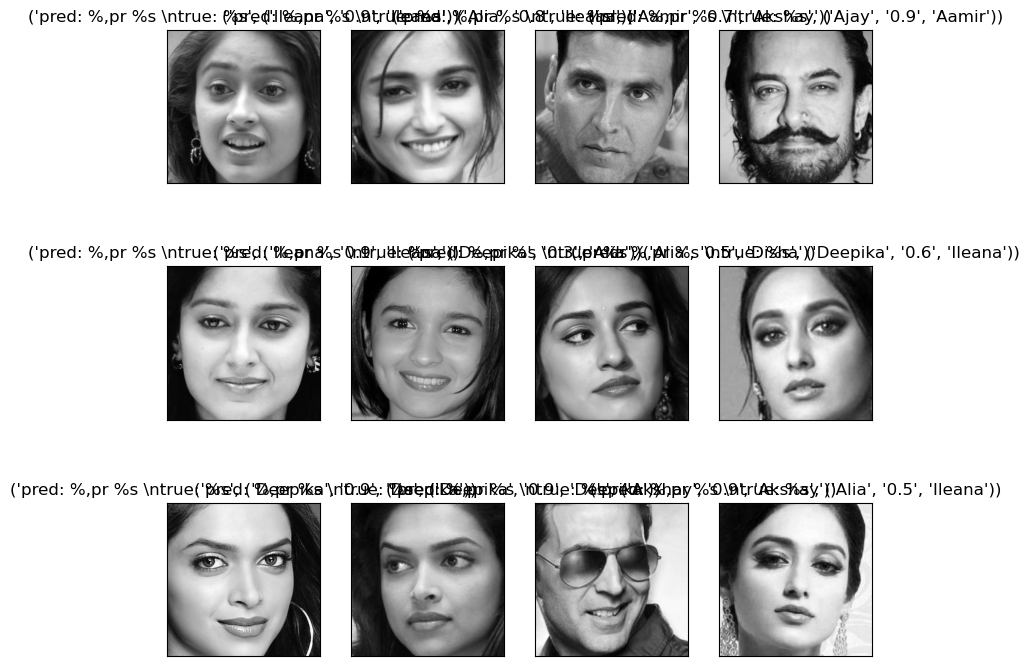

In [13]:
print("Accuracy:",true_positive*100/y_pred.shape[0])

plot_gallery(x_test,prediction_titles,h,w)
plt.show()